In [1]:
# Peter Nelson 10/1/20
# Three different regresion models are fit to predict values of gain using the determined data before being evaluated.

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline  

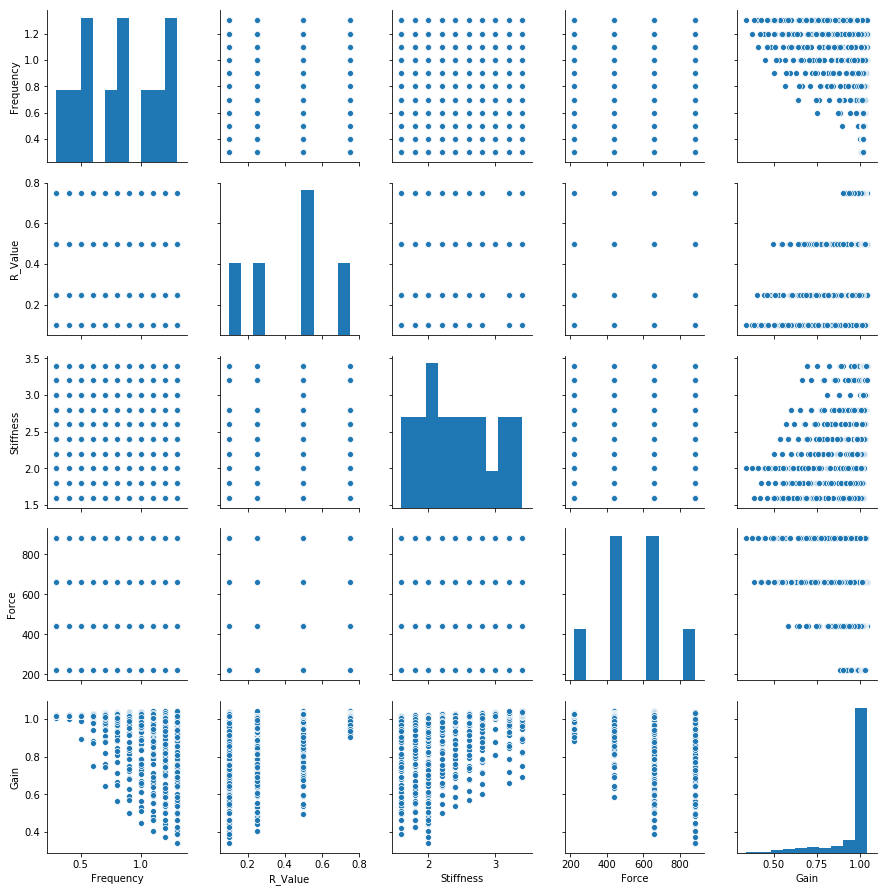

In [2]:
data=pd.read_csv(r"C:\Users\Public\MLinputs_Gain.csv")
pair_gain=sns.pairplot(data)
pair_gain.savefig("Report Pair Gain.png")

# ML Preparation & Imports

In [3]:
from math import sqrt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

In [4]:
X = data.drop(['Gain'],axis=1)
Y = pd.DataFrame(data.Gain)
processed_X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(processed_X, Y, test_size=0.2, random_state=42)
ravelled_y_train=np.ravel(y_train['Gain'])

# Gaussian Process Regression

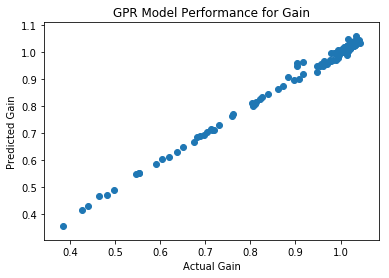

In [6]:
kernel = RBF() + DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,normalize_y= False).fit(X_train, y_train)

predictions_gauss, sigma=gpr.predict(X_test, return_std=True)

plt.scatter(y_test,predictions_gauss)
plt.xlabel('Actual Gain')
plt.ylabel('Predicted Gain')
plt.title('GPR Model Performance for Gain')
plt.savefig('Report ML GPR Performance.png')

In [7]:
gpr.score(X_train, y_train)

0.9988982377486669

In [8]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, predictions_gauss)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, predictions_gauss))))
print('R^2 is {}'.format(r2_score(y_test, predictions_gauss)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, predictions_gauss)))

Mean Absolute Error is 0.005341666937493026
Root Mean Squared Error is 0.009244371125957133
R^2 is 0.9954398070766003
Explained Regression Variance is 0.99544466867307


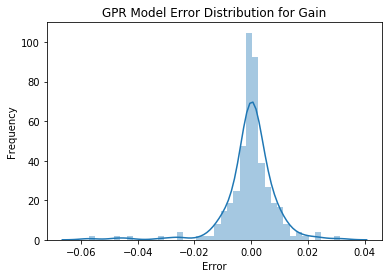

In [9]:
error_gpr=y_test-predictions_gauss
sns.distplot((y_test-predictions_gauss), bins = 40);
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('GPR Model Error Distribution for Gain')
plt.savefig('Report ML GPR Error.png')

## Saving Model

In [10]:
from sklearn.externals import joblib 
joblib.dump(gpr, 'Gauss Model.pkl') 

# Support Vector Regression

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Grid Search

In [12]:
clf = GridSearchCV(SVR(), 
    {'gamma':[0.5,1,2],
     'epsilon':[0.00001,0.0001,0.001],
     'C': [0.5,1,2,10],
    'kernel': ['rbf']}, 
    return_train_score=False)
clf.fit(X_train, y_train)

In [13]:
df = pd.DataFrame(clf.cv_results_)
df = df[df['mean_test_score']  >= 0.9957]  
df[['param_C','param_gamma','param_epsilon','param_kernel','mean_test_score']]

In [15]:
svr_model = SVR(C=1, epsilon=0.0001,gamma=1,kernel='rbf')
svr_model.fit(X_train,ravelled_y_train)
svr_model.score(X_test, y_test)

0.9973888237183748

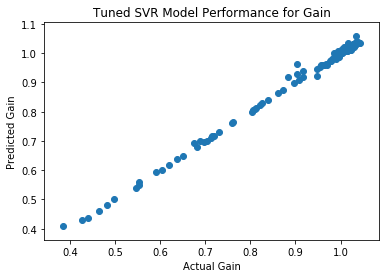

In [16]:
svr_predictions=svr_model.predict(X_test)
plt.scatter(y_test, svr_predictions)
plt.xlabel('Actual Gain')
plt.ylabel('Predicted Gain')
plt.title('Tuned SVR Model Performance for Gain')
plt.savefig('Report ML SVR Performance.png')

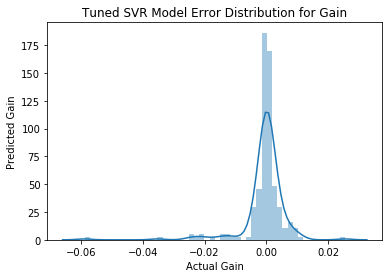

In [17]:
difference = []

for i in range(0,220):
    difference.append(y_test.values[i][0]-svr_predictions[i])
    
sns.distplot(difference)
plt.xlabel('Actual Gain')
plt.ylabel('Predicted Gain')
plt.title('Tuned SVR Model Error Distribution for Gain')
plt.savefig('Report ML SVR Error.png')

error_svr=difference

## Saving Model

In [18]:
from sklearn.externals import joblib 
joblib.dump(svr_model, 'SVR_Gain_Model.pkl') 

## Evaluative Metrics

In [19]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, svr_predictions)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, svr_predictions))))
print('R^2 is {}'.format(r2_score(y_test, svr_predictions)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, svr_predictions)))

Mean Absolute Error is 0.0031909561204777623
Root Mean Squared Error is 0.006995259989883796
R^2 is 0.9973888237183749
Explained Regression Variance is 0.997409317496646


# Standard Linear Regression Model

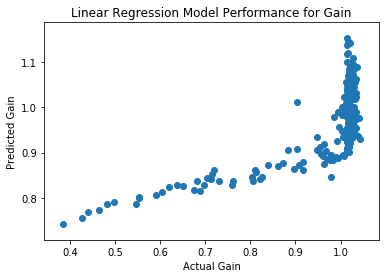

In [21]:
lm=LinearRegression(normalize=True)
lm.fit(X_train,y_train)
lm_predictions=lm.predict(X_test)
plt.scatter(y_test,lm_predictions) 
plt.xlabel('Actual Gain')
plt.ylabel('Predicted Gain')
plt.title('Linear Regression Model Performance for Gain')
plt.savefig('Report ML Linear Performance.png')

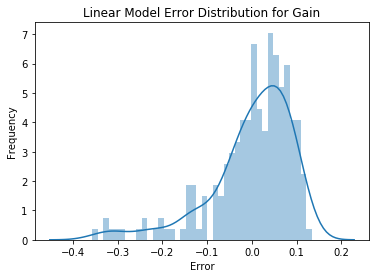

In [22]:
error_linear=y_test-lm_predictions
sns.distplot((y_test-lm_predictions), bins = 40);
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Linear Model Error Distribution for Gain')
plt.savefig('Report ML Linear Model Error.png')

## Evaluative Metrics

In [23]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, lm_predictions)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, lm_predictions))))
print('R^2 is {}'.format(r2_score(y_test, lm_predictions)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, lm_predictions)))

Mean Absolute Error is 0.06870878434778468
Root Mean Squared Error is 0.0933091985203126
R^2 is 0.5354019425486947
Explained Regression Variance is 0.5354570107705721
